# Color threshold: Blue screen 

#### import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Read images

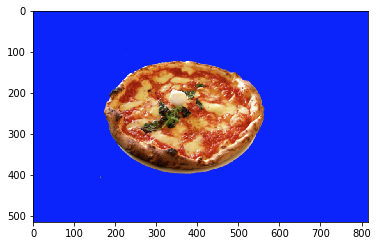

In [2]:
#Read image from disk
image = cv2.imread('images/pizza_bluescreen.jpg')


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

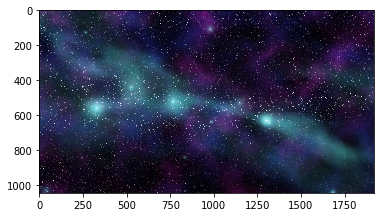

In [3]:
imageBackGround = cv2.imread('images/space_background.jpg')

image_rgb_background = cv2.cvtColor(imageBackGround, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb_background)

#### Define thresholds for blue screen

In [39]:
low_blue = np.array([0, 0, 100])
upper_blue = np.array([80, 80, 255])


#### Define a mask using the thresholds

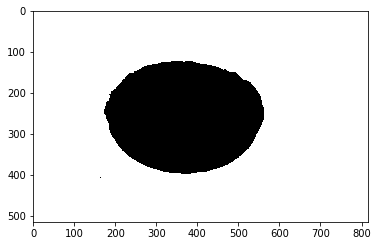

In [48]:
mask = cv2.inRange(image_rgb, low_blue, upper_blue)

plt.imshow(mask, cmap="gray")

#### Mask the image

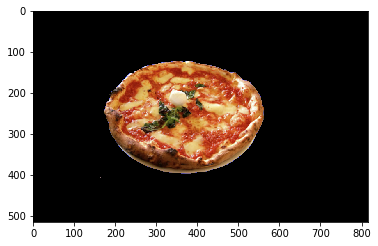

In [44]:
masked_image = np.copy(image_rgb)

masked_image[mask!=0] = [0,0,0]

plt.imshow(masked_image)

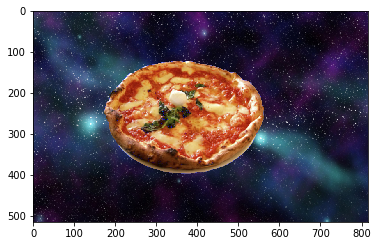

In [65]:
dim = (816,514)

masked_image_background = cv2.resize(image_rgb_background, dim, interpolation = cv2.INTER_AREA)

masked_fin_image = np.copy(masked_image)

masked_fin_image[masked_image==0]+= masked_image_background[masked_image==0]

plt.imshow(masked_fin_image)